## Importance sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from scipy.stats.distributions import norm
%matplotlib inline

In [2]:
# Define the target distribution (gaussian mixture)
x_grid = np.linspace(-100,100,1000)
rho = 0.3
mus = [-20, 20]
sigmas = [10, 10]
target_distribution = (rho * norm(mus[0], sigmas[0]).pdf(x_grid) +
            (1-rho) * norm(mus[1], sigmas[1]).pdf(x_grid))
target_cumulative = (rho * norm(mus[0], sigmas[0]).cdf(x_grid) +
            (1-rho) * norm(mus[1], sigmas[1]).cdf(x_grid))

In [3]:
def pdfTargetDistribution(x):
    return np.array((rho * norm(mus[0], sigmas[0]).pdf(x) +
            (1-rho) * norm(mus[1], sigmas[1]).pdf(x)))

def cdfTargetDistribution(x):
    return np.array((rho * norm(mus[0], sigmas[0]).cdf(x) +
            (1-rho) * norm(mus[1], sigmas[1]).cdf(x)))

def pdfProposalDistribution(x, mu_proposal, sigma_proposal):
    return np.array(norm(mu_proposal, sigma_proposal).pdf(x))

def cdfProposalDistribution(x, mu_proposal, sigma_proposal):
    return np.array(norm(mu_proposal, sigma_proposal).cdf(x))


def sampleFromProposal(mu_proposal, sigma_proposal, nb_samples):
    return np.random.normal(mu_proposal, sigma_proposal, nb_samples)

In [5]:
#Perform IS 
mu_proposal = 10
sigma_proposal = 30
nb_samples = 1000
samples_IS = sampleFromProposal(mu_proposal, sigma_proposal, nb_samples)
proposal_distribution = pdfProposalDistribution(x_grid,mu_proposal, sigma_proposal)
importance_weights = pdfTargetDistribution(samples_IS) / pdfProposalDistribution(samples_IS, mu_proposal, sigma_proposal)
importance_weights_normalized = importance_weights/np.sum(importance_weights)
w_cdf = cdfTargetDistribution(samples_IS) / cdfProposalDistribution(samples_IS, mu_proposal, sigma_proposal)
w_cdf_normalized = w_cdf / np.sum(w_cdf)

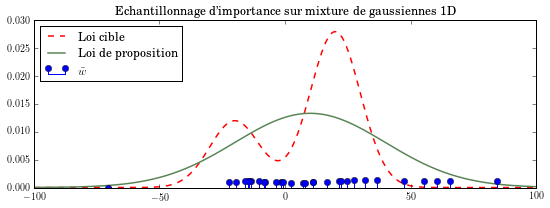

In [15]:
# Plot the target, proposal, and weights:
plt.plot(x_grid, target_distribution, '--', color="red", lw=1.5, label="Loi cible")
plt.plot(x_grid, proposal_distribution, color="darksage", lw=1.5, label="Loi de proposition")
plt.stem(samples_IS[:30], w_cdf_normalized[:30],'--', linefmt="b-", basefmt="b-", label=r"$\tilde{w}$")
plt.legend(loc=2)
plt.title("Echantillonnage d'importance sur mixture de gaussiennes 1D")
#plt.savefig("courbe_IS_gmm_1D.png", format="png", dpi=1000)

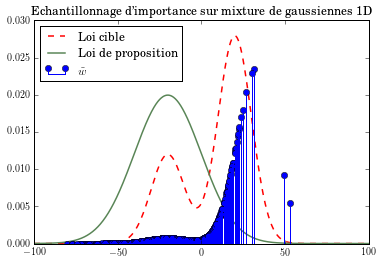

In [6]:
samples_IS_inf = sampleFromProposal(-20, 20, nb_samples)
proposal_distribution_bad_inf = pdfProposalDistribution(x_grid, -20, 20)
seuil = 1000

importance_weights = pdfTargetDistribution(samples_IS_inf) / pdfProposalDistribution(samples_IS_inf, -20, 20)
importance_weights_normalized = importance_weights/np.sum(importance_weights)
plt.plot(x_grid, target_distribution, '--', color="red", lw=1.5, label="Loi cible")
plt.plot(x_grid, proposal_distribution_bad_inf, color="darksage", lw=1.5, label="Loi de proposition")
plt.stem(samples_IS_inf[:seuil], importance_weights_normalized[:seuil],'--', linefmt="b-", basefmt="b-", label=r"$\tilde{w}$")
plt.legend(loc=2)
plt.title("Echantillonnage d'importance sur mixture de gaussiennes 1D")

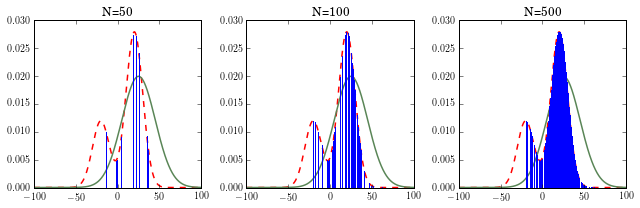

In [6]:

np.random.seed(3535)
samples_IS_inf = sampleFromProposal(25, 20, nb_samples)
proposal_distribution_bad_inf = pdfProposalDistribution(x_grid, 25, 20)
importance_weights = pdfTargetDistribution(samples_IS_inf) / pdfProposalDistribution(samples_IS_inf, 25, 20)
importance_weights_normalized = importance_weights/np.sum(importance_weights)

plt.rcParams['figure.figsize'] = 9, 3
plt.subplot(131)
plt.title('N=50' )
seuil = 10
proposal_on_weights = pdfTargetDistribution(samples_IS_inf[:seuil])
plt.plot(x_grid, target_distribution, '--', color="red", lw=1.5, label="Loi cible")
plt.plot(x_grid, proposal_distribution_bad_inf, color="darksage", lw=1.5, label="Loi de proposition")
plt.stem(samples_IS_inf[:seuil], proposal_on_weights,'--', markerfmt=" ", linefmt="b-", basefmt="b-", label=r"$\tilde{w}$")
plt.subplot(132)
plt.title('N=100')
seuil = 50
proposal_on_weights = pdfTargetDistribution(samples_IS_inf[:seuil])
plt.plot(x_grid, target_distribution, '--', color="red", lw=1.5, label="Loi cible")
plt.plot(x_grid, proposal_distribution_bad_inf, color="darksage", lw=1.5, label="Loi de proposition")
plt.stem(samples_IS_inf[:seuil], proposal_on_weights,'--', markerfmt=" ", linefmt="b-", basefmt="b-", label=r"$\tilde{w}$")
plt.subplot(133)
plt.title('N=500')
seuil = 200
proposal_on_weights = pdfTargetDistribution(samples_IS_inf[:seuil])
plt.plot(x_grid, target_distribution, '--', color="red", lw=1.5, label="Loi cible")
plt.plot(x_grid, proposal_distribution_bad_inf, color="darksage", lw=1.5, label="Loi de proposition")
plt.stem(samples_IS_inf[:seuil], proposal_on_weights,'--', markerfmt=" ", linefmt="b-", basefmt="b-", label=r"$\tilde{w}$")
plt.tight_layout()
plt.savefig("courbe_IS_bad_proposal.png",format="png",dpi=1000)


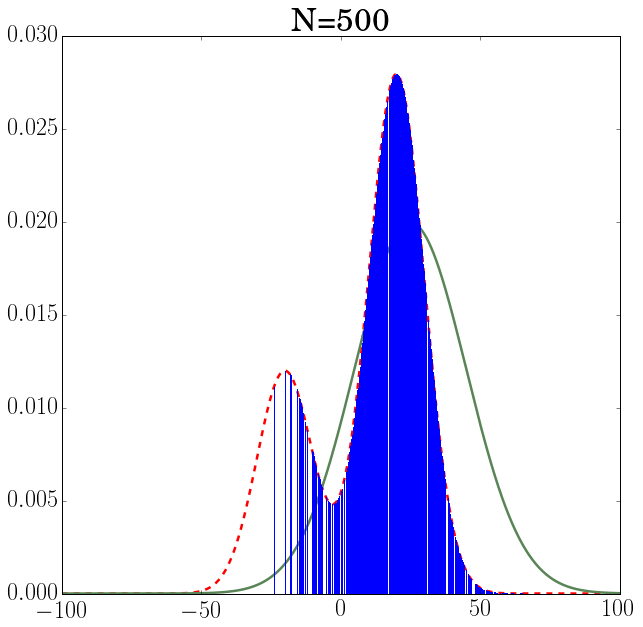

In [20]:
plt.figure(figsize=(10, 10))
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(24)
plt.title('N=500', fontsize=32)
seuil = 500
proposal_on_weights = pdfTargetDistribution(samples_IS_inf[:seuil])
plt.plot(x_grid, target_distribution, '--', color="red", lw=2.5, label="Loi cible")
plt.plot(x_grid, proposal_distribution_bad_inf, color="darksage", lw=2.5, label="Loi de proposition")
plt.stem(samples_IS_inf[:seuil],
         proposal_on_weights,
         '--',
         markerfmt=" ",
         linefmt="b-",
         basefmt="b-", 
         label=r"$\tilde{w}$")
plt.savefig("is_vanilla_bad_500.pdf", dpi=80)
